In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array
import warnings
warnings.filterwarnings("ignore")

img_height_presence = 180
img_width_presence = 180
batch_size_presence = 32

img_height_BM = 200
img_width_BM = 200
batch_size_BM = 16

class_names_presence = ['no', 'yes']
class_names_type = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
class_names_malignancy = ['Benign', 'Malignant']

In [25]:
image_path = input("Enter the path to the image: ")
import os
if not os.path.exists(image_path):
    print("Image not found. Please check the path and try again.")
else:
    print("Image found. Proceeding with the analysis...")

Image found. Proceeding with the analysis...


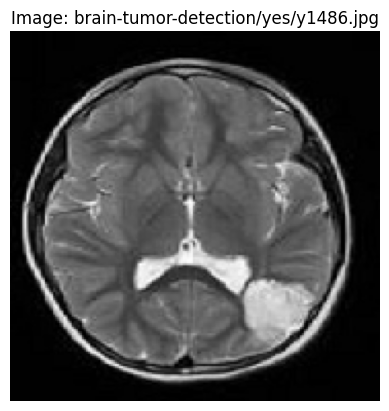

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Is a tumor likely present?: Yes
Is this tumor benign or malignant?: Malignant


In [ ]:
# normalize the image
def normalize_image(image, img_height, img_width):
    image = tf.image.resize(image, [img_height, img_width])
    image = tf.cast(image, tf.float32) / 255.0
    return image

reloaded_yn = tf.keras.models.load_model("saved_models/yes-no.keras")
reloaded_BM = tf.keras.models.load_model("saved_models/BM_model.keras")
#reloaded_type = tf.keras.models.load_model("saved_models/1846955898.keras")
#test on a random image
img = load_img(image_path, target_size=(img_height_presence, img_width_presence))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.figure()
plt.imshow(img)
plt.title(f"Image: {image_path}")
plt.axis("off")
plt.show()

# Predict the class
predictions = reloaded_yn.predict(img_array)
predicted_class_yn = class_names_presence[tf.argmax(predictions[0]).numpy()]


predictions = reloaded_type.predict(img_array)
predicted_class_type = class_names_type[tf.argmax(predictions[0]).numpy()]


img = load_img(image_path, target_size=(img_height_BM, img_width_BM))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

predictions = reloaded_BM.predict(img_array)
predicted_class_BM = class_names_malignancy[tf.argmax(predictions[0]).numpy()]

# Print the result
print(f"Is a tumor likely present?: {predicted_class_yn.capitalize()}")
print(f"If present, what kind of tumor is it?: {predicted_class_type.capitalize()}")
print(f"Is this tumor benign or malignant?: {predicted_class_BM.capitalize()}")